In [1]:
import tensorflow as tf
print(tf.__version__)

2.4.1


***MNIST Hand Writing Digit 

In [2]:
from tensorflow.keras.datasets import mnist
(train_images , train_lables) , (test_images , test_labels) = mnist.load_data()

In [5]:
len(test_images) #images size 28 by 28 =  784 pixels

10000

In [7]:
train_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [8]:
train_images[0].ndim

2

In [9]:
#check no of rows and columns total lengt 
train_images.shape

(60000, 28, 28)

In [10]:
test_images.shape

(10000, 28, 28)

TypeError: Invalid shape (784,) for image data

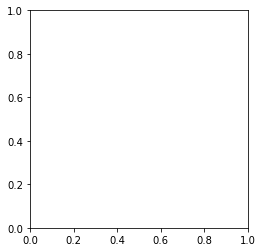

In [31]:
train_lables[0]


In [13]:
from tensorflow.keras import models
from tensorflow.keras import layers
#Dense Means fully connected to each other 


In [14]:
#Network architecture 
network = models.Sequential()
network.add(layers.Dense(512 , activation="relu" , input_shape=(28*28 , )))
network.add(layers.Dense(10 , activation="softmax"))

In [15]:
#compilation Step
network.compile(optimizer="rmsprop",
               loss="categorical_crossentropy",
               metrics = ['acc'])

In [17]:
#preparing image Data or Normliz Data
train_images = train_images.reshape(60000 , 28*28)
train_images = train_images.astype('float')/255
test_images = test_images.reshape(10000 , 28*28)
test_images = test_images.astype('float')/255

In [19]:
# preparing labels
print(train_lables[5])
from tensorflow.keras.utils import to_categorical
train_lables = to_categorical(train_lables)
test_labels = to_categorical(test_labels)
print(train_lables[5])

2
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


In [20]:
#traing Models
network.fit(train_images , train_lables , epochs=5 , batch_size=128)

Epoch 1/5
469/469 [==============================] - 9s 12ms/step - loss: 0.4326 - acc: 0.8745
Epoch 2/5
469/469 [==============================] - 6s 12ms/step - loss: 0.1097 - acc: 0.9673
Epoch 3/5
469/469 [==============================] - 6s 12ms/step - loss: 0.0691 - acc: 0.9789
Epoch 4/5
469/469 [==============================] - 6s 12ms/step - loss: 0.0480 - acc: 0.9857
Epoch 5/5
469/469 [==============================] - 6s 12ms/step - loss: 0.0360 - acc: 0.9896


In [21]:
#model evaluation 

test_loss , test_acc = network.evaluate(test_images , test_labels)

313/313 [==============================] - 2s 3ms/step - loss: 0.0652 - acc: 0.9795


In [22]:
print("test_acc" , test_acc)

test_acc 0.9794999957084656


In [23]:
print("test_acc" , test_loss)

test_acc 0.06515024602413177


In [25]:
network.predict(test_images)[0]

array([9.5189812e-09, 2.6093017e-10, 2.5894826e-06, 1.7123958e-04,
       6.0933783e-13, 7.9777758e-09, 1.6229271e-13, 9.9982482e-01,
       1.1010859e-07, 1.1547498e-06], dtype=float32)

In [36]:
digit = test_images[0]
#pixels = digit.reshape((28, 28))


In [38]:
from matplotlib import pyplot as plt

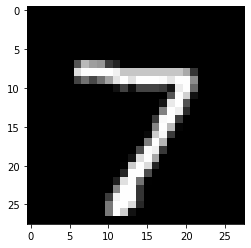

In [42]:
plt.imshow(pixels , cmap='gray')